# GPAW Tutorial for DeepChem

This tutorial demonstrates how to use GPAW, a Python-based DFT (Density Functional Theory) software, with DeepChem. We'll calculate the electronic structure of a simple material: the silicon (Si) unit cell.

## Setup

In [1]:
#%conda install conda-forge::libxc
#%pip install git+https://gitlab.com/gpaw/gpaw
#%gpaw install-data .

## Step 1: Create the Unit Cell

We'll use ASE to define the silicon unit cell:

In [2]:
from ase.lattice.cubic import Diamond

# Define a diamond structure for silicon
si = Diamond(symbol="Si", latticeconstant=5.43)

# Visualize the structure
print(si)

Lattice(symbols='Si8', pbc=True, cell=[5.43, 5.43, 5.43])


## Step 2: Set Up the GPAW Calculator

GPAW uses the ASE interface for DFT calculations. We'll set up a calculator for the silicon unit cell:

In [3]:
from gpaw import GPAW, PW

# Set up GPAW calculator with plane-wave basis
calc = GPAW(mode=PW(300),  # Plane wave cutoff energy in eV
            xc='PBE',      # Exchange-correlation functional
            kpts=(4, 4, 4),# k-point grid
            txt='si_gpaw_output.txt')

# Attach calculator to the Si unit cell
si.calc = calc

## Step 3: Perform the Calculation

Run a single-point energy calculation:

In [4]:
# Perform calculation
energy = si.get_potential_energy()
print(f"Total energy: {energy} eV")

Total energy: -43.14923272619888 eV


The output will include the total energy of the silicon unit cell, and details will be logged in `si_gpaw_output.txt`.

## Step 4: Extract and Visualize Results

Extract data from the calculation:

In [5]:
# Get Fermi level
fermi_level = calc.get_fermi_level()
print(f"Fermi level: {fermi_level} eV")

# Get density of states (DOS)
dos = calc.get_dos()
print(f"Density of states: {dos}")

Fermi level: 5.597684618008102 eV
Density of states: (array([-6.94711413, -6.86095486, -6.77479559, -6.68863632, -6.60247705,
       -6.51631778, -6.43015851, -6.34399924, -6.25783998, -6.17168071,
       -6.08552144, -5.99936217, -5.9132029 , -5.82704363, -5.74088436,
       -5.65472509, -5.56856582, -5.48240656, -5.39624729, -5.31008802,
       -5.22392875, -5.13776948, -5.05161021, -4.96545094, -4.87929167,
       -4.7931324 , -4.70697314, -4.62081387, -4.5346546 , -4.44849533,
       -4.36233606, -4.27617679, -4.19001752, -4.10385825, -4.01769898,
       -3.93153972, -3.84538045, -3.75922118, -3.67306191, -3.58690264,
       -3.50074337, -3.4145841 , -3.32842483, -3.24226556, -3.1561063 ,
       -3.06994703, -2.98378776, -2.89762849, -2.81146922, -2.72530995,
       -2.63915068, -2.55299141, -2.46683214, -2.38067288, -2.29451361,
       -2.20835434, -2.12219507, -2.0360358 , -1.94987653, -1.86371726,
       -1.77755799, -1.69139872, -1.60523946, -1.51908019, -1.43292092,
       -1.

You can visualize the density of states using libraries such as matplotlib:

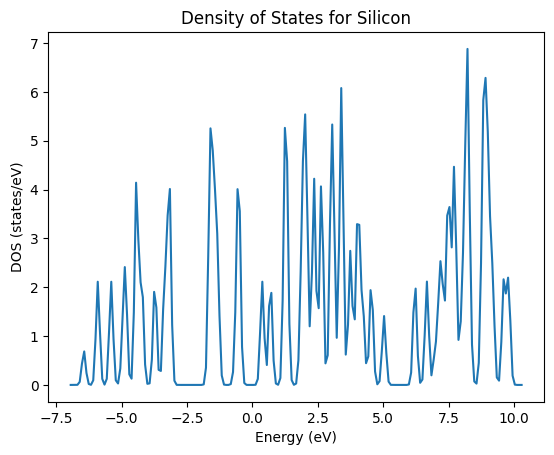

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `calc.get_dos()` returns (energies, dos_values)
energies, dos_values = calc.get_dos()
dos = np.column_stack((energies, dos_values))

# Plot density of states
plt.plot(dos[:, 0], dos[:, 1])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (states/eV)')
plt.title('Density of States for Silicon')
plt.show()


## Step 5: Integrate with DeepChem

DeepChem can help manage material datasets and post-process electronic properties. Here's an example of using DeepChem to create a dataset:

In [8]:
import deepchem as dc

# Create a dataset with material properties
data = dc.data.DiskDataset.from_numpy(
    X=[{'lattice': si.get_cell(), 'energy': energy, 'fermi_level': fermi_level}],
    y=[energy],
    ids=['Si-unit-cell']
)

print(data)

<DiskDataset X.shape: (1,), y.shape: (1,), w.shape: (1,), ids: ['Si-unit-cell'], task_names: [0]>
